In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv('Advertising.csv', index_col=0)
data

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
...,...,...,...,...
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
TV           200 non-null float64
radio        200 non-null float64
newspaper    200 non-null float64
sales        200 non-null float64
dtypes: float64(4)
memory usage: 7.8 KB


In [4]:
data.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [5]:
data.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [6]:
data.corr()
# TV ads are highly correlated to sales

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


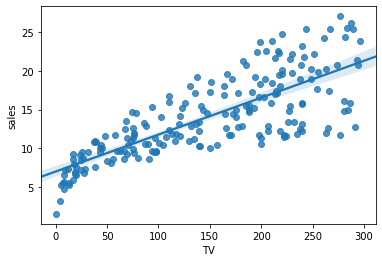

In [7]:
sns.regplot(x='TV', y='sales', data=data)
plt.show()
# There is a strong relationship between TV ads and sales

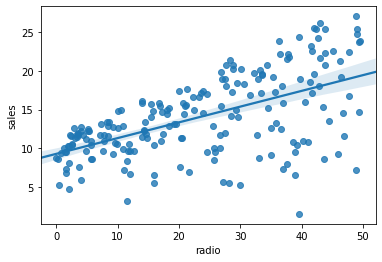

In [8]:
sns.regplot(x='radio', y='sales', data=data)
plt.show()
# There is a weak relationship between radio ads and sales

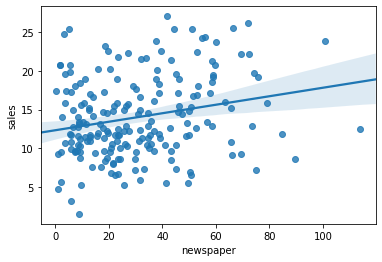

In [9]:
sns.regplot(x='newspaper', y='sales', data=data)
plt.show()
# There is a very weak relationship between newspaper ads and sales

In [10]:
Q1=data.quantile(0.25)
Q3=data.quantile(0.75)
IQR=Q3-Q1
print(IQR)

TV           144.450
radio         26.550
newspaper     32.350
sales          7.025
dtype: float64


In [11]:
data=data[~((data < (Q1-1.5*IQR)) | (data > (Q3+1.5*IQR))).any(axis=1)]
data.shape

(198, 4)

In [12]:
data.skew()
# The skewness for the data seems to be within the optimum range of -0.5 and 0.5

TV          -0.082332
radio        0.114842
newspaper    0.650112
sales        0.407130
dtype: float64

In [13]:
data['newspaper']=np.log1p(data['newspaper'])

In [14]:
data.skew()

TV          -0.082332
radio        0.114842
newspaper   -0.839481
sales        0.407130
dtype: float64

In [15]:
x=data.drop(columns=['sales'])
y=data['sales']

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)
lr=LinearRegression()
lr.fit(x_train,y_train)
print(lr.intercept_)
print(lr.coef_)

2.5672654711162632
[0.04522436 0.18212317 0.18232052]


In [17]:
# TV ads: for every unit of investment in TV ads, sales are likely to increase by 0.044 items
# Radio: for every unit of investment in Radio ads, sales are likely to increase by 0.189 items. However, the investment may not achieve the increase in sales everytime, since the correlation between radio ads and sales is weak.
# Newspaper: for every unit of investment in Radio ads, sales are likely to increase by 0.002 items. This indicates that investment newspaper ads is likley to increase sales as compared to TV and radio ads.

In [18]:
# Standardizing all features to a common scale for further analysis
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(x)
x=sc.transform(x)
x=pd.DataFrame(x)

In [19]:
# Using Linear regression model
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)
lr=LinearRegression()
lr.fit(x_train,y_train)
predicty=lr.predict(x_test)
print('The mean absolute error for linear regression model is :', mean_absolute_error(y_test, predicty))
print('The mean square error for linear regression model is :', mean_squared_error(y_test, predicty))
print('The r2 score for linear regression model is :', r2_score(y_test, predicty))

The mean absolute error for linear regression model is : 1.25721449080364
The mean square error for linear regression model is : 2.791872637535146
The r2 score for linear regression model is : 0.8970666097335797


In [20]:
# Using cross validation score to avoid underfitting and overfitting of model
print("Mean r2 score for Linear Regression: ",cross_val_score(lr,x,y,cv=5,scoring="r2").mean())
print("standard deviation in r2 score for Linear Regression: ",cross_val_score(lr,x,y,cv=5,scoring="r2").std())
print(cross_val_score(lr,x,y,cv=5,scoring="r2"))

Mean r2 score for Linear Regression:  0.8862866381230523
standard deviation in r2 score for Linear Regression:  0.04012470888401666
[0.87934686 0.91754231 0.92591584 0.81302291 0.89560526]


In [21]:
# Using KNN regressor
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
knr=KNeighborsRegressor()
hyperparameter={"n_neighbors":range(1,50)}
gridknr = GridSearchCV(knr, hyperparameter, cv=10)
gridknr.fit(x,y)
gridknr.best_params_

{'n_neighbors': 3}

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)
knr=KNeighborsRegressor(n_neighbors=2)
knr.fit(x_train,y_train)
predicty=knr.predict(x_test)
print('The mean absolute error for KNeighborsRegressor model is :', mean_absolute_error(y_test, predicty))
print('The mean square error for KNeighborsRegressor model is :', mean_squared_error(y_test, predicty))
print('The r2 score for KNeighborsRegressor model is :', r2_score(y_test, predicty))

The mean absolute error for KNeighborsRegressor model is : 0.9775000000000003
The mean square error for KNeighborsRegressor model is : 2.0690000000000004
The r2 score for KNeighborsRegressor model is : 0.9237181590599894


In [23]:
# Using cross validation score to avoid underfitting and overfitting of model
print("Mean r2 score for Linear Regression: ",cross_val_score(knr,x,y,cv=5,scoring="r2").mean())
print("standard deviation in r2 score for Linear Regression: ",cross_val_score(knr,x,y,cv=5,scoring="r2").std())

Mean r2 score for Linear Regression:  0.9231483204380957
standard deviation in r2 score for Linear Regression:  0.03569515080197966


In [24]:
# Using Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()
hyperparametersrfr={'criterion':['mse','mae'],'max_depth':range(1,10)}
gridrfr=GridSearchCV(rfr, hyperparametersrfr, cv=5, scoring='r2')
gridrfr.fit(x,y)
print(gridrfr.best_params_)

{'criterion': 'mae', 'max_depth': 9}


In [25]:
rfr=RandomForestRegressor(criterion='mae', max_depth=9)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)
rfr.fit(x_train,y_train)
predicty=rfr.predict(x_test)
print('The mean absolute error for KNeighborsRegressor model is :', mean_absolute_error(y_test, predicty))
print('The mean square error for KNeighborsRegressor model is :', mean_squared_error(y_test, predicty))
print('The r2 score for KNeighborsRegressor model is :', r2_score(y_test, predicty))

The mean absolute error for KNeighborsRegressor model is : 0.4913750000000003
The mean square error for KNeighborsRegressor model is : 0.3735743750000004
The r2 score for KNeighborsRegressor model is : 0.9862267080459092


In [27]:
# Using cross validation score to avoid underfitting and overfitting of model
print("Mean r2 score for Linear Regression: ",cross_val_score(rfr,x,y,cv=5,scoring="r2").mean())
print("standard deviation in r2 score for Linear Regression: ",cross_val_score(rfr,x,y,cv=5,scoring="r2").std())

Mean r2 score for Linear Regression:  0.9706974541118594
standard deviation in r2 score for Linear Regression:  0.007404281904575887


In [29]:
# Among all the models, Random Forest Regressor predicted results most accurately
rfr=RandomForestRegressor(criterion='mae', max_depth=9)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)
rfr.fit(x_train,y_train)
predictrfry=rfr.predict(x_test)
predictrfry

array([ 8.68 , 12.965, 23.82 , 10.555,  6.41 , 23.54 , 19.585, 12.6  ,
       15.075, 14.53 , 14.92 , 21.56 ,  5.81 , 13.52 ,  9.11 , 10.25 ,
        5.74 , 11.69 ,  9.71 , 12.63 , 13.65 , 16.98 , 24.435,  6.66 ,
       16.64 , 21.99 ,  7.91 , 12.48 ,  6.87 , 12.785, 18.82 , 14.44 ,
        9.07 , 13.18 , 12.49 , 17.91 , 15.28 , 12.585, 19.365, 16.62 ])

In [30]:
from sklearn.metrics import mean_squared_error
print("RMSE is: ",np.sqrt(mean_squared_error(y_test,predictrfry)))
print("r2_score is: ",r2_score(y_test,predictrfry))

RMSE is:  0.7075326847573898
r2_score is:  0.9815433154764758


In [31]:
# Saving the model
from sklearn.externals import joblib 
joblib.dump(rfr, 'Advertising_channel.pkl')

['Advertising_channel.pkl']